<a href="https://colab.research.google.com/github/flaviowu/btc-c14-g4/blob/main/notebooks/analise_exploratoria_bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import random
import numpy as np
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modulo 6/train_clean_rev2.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modulo 6/test_raw.csv')

#### Preparando o dataset de treino

In [3]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,date,stock,main_cat,sub_cat_1,sub_cat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,2018-6-18,27,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,2018-3-18,15,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2018-10-25,14,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,2018-2-20,1,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,2018-4-16,13,Women,Jewelry,Necklaces


In [4]:
train = train.drop(['brand_name', 'date', 'stock'], axis=1)
train.head()

,name,item_condition_id,price,shipping,item_description,main_cat,sub_cat_1,sub_cat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,10.0,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


#### Preparando o dataset de teste

In [5]:
test = test.drop(['Unnamed: 0', 'test_id','brand_name', 'date', 'stock'], axis=1).dropna()
test.head()

,name,item_condition_id,category_name,shipping,item_description
0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,1,Size 7
1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,1,Brand new coach bag. Bought for [rm] at a Coac...
3,Floral Kimono,2,Women/Sweaters/Cardigan,0,-floral kimono -never worn -lightweight and pe...
4,Life after Death,3,Other/Books/Religion & Spirituality,1,Rediscovering life after the loss of a loved o...


In [6]:
test.isna().sum()


name                 0
item_condition_id    0
category_name        0
shipping             0
item_description     0
dtype: int64

In [7]:
# dividindo as categorias em colunas
categories = test.category_name.str.split('/', expand=True)
categories.columns = ['main_cat', 'sub_cat_1', 'sub_cat_2', 'sub_cat_3', 'sub_cat_4']

test = pd.concat([test, categories], axis=1)
test.drop(['category_name', 'sub_cat_3', 'sub_cat_4'], axis=1, inplace=True)

test.columns

Index(['name', 'item_condition_id', 'shipping', 'item_description', 'main_cat',
       'sub_cat_1', 'sub_cat_2'],
      dtype='object')

## CONDIÇÃO DOS ITENS

In [8]:
print('Total de NaN nas colunas irem_condition_id e price\n')
train[['item_condition_id', 'price']].isna().mean()

Total de NaN nas colunas irem_condition_id e price



item_condition_id    0.0
price                0.0
dtype: float64

#### A condição dos itens que mais aparece é a **condição 1**, com 43% do total.

In [9]:
print('Números totais:' )
train.item_condition_id.value_counts()

Números totais:


1    638324
3    430402
2    373302
4     31803
5      2373
Name: item_condition_id, dtype: int64

In [10]:
print('Porcentagem:' )
train.item_condition_id.value_counts(normalize = True).mul(100).round(1).astype(str) + '%' # Frequencias relativas

Porcentagem:


1    43.2%
3    29.2%
2    25.3%
4     2.2%
5     0.2%
Name: item_condition_id, dtype: object

## PREÇO POR CONDIÇÃO

#### As **condições 1** e **3** se destacam com os **maiores valores totais**. Tendo **mais de 70%** do todo.

In [11]:
preco_total_por_condicao = []

for condicao in range(1,6):
    preco_total_por_condicao.append(train[train['item_condition_id'] 
                                          == condicao].price.sum())

serie_preco = pd.Series(index = range(1,6), 
                                data = preco_total_por_condicao)
print('Números totais:' )
serie_preco

Números totais:


1    16911379.0
2    10294711.0
3    11422223.0
4      774887.5
5       75354.0
dtype: float64

In [12]:
porc_preco_por_condicao = (serie_preco 
                          / serie_preco.sum()).mul(100).round(1).astype(str) + '%'
print('Porcentagem:' )
porc_preco_por_condicao

Porcentagem:


1    42.8%
2    26.1%
3    28.9%
4     2.0%
5     0.2%
dtype: object

#### **Preço medio** por condição dos itens. Os itens com **condição 5** se destacam com a **maior media** de preços.

In [13]:
preco_medio_por_condicao = []

for condicao in range(1,6):
    preco_medio_por_condicao.append(train[train['item_condition_id'] 
                                          == condicao].price.mean().round(2))

pd.Series(index = range(1,6), data = preco_medio_por_condicao)

1    26.49
2    27.58
3    26.54
4    24.37
5    31.75
dtype: float64

## INVESTIGAR AS CATEGORIAS DOS ITENS COM CONDIÇÃO 1

#### Principais categorias da condição 1 por coluna






In [14]:
condicao_1 = train[train['item_condition_id'] == 1]

condicao_1[['main_cat',	'sub_cat_1',	'sub_cat_2']].describe()

,main_cat,sub_cat_1,sub_cat_2
count,638324,638324,638324
unique,10,113,829
top,Women,Makeup,Face
freq,228077,89130,33787


#### **Women** e **Beauty** são as principais categorias da *coluna 'main_cat'* em condicao_1, chegando a mais de **58% do total** dos itens.

In [15]:
print('Frequencia relativa das categorias com condição 1\n')
condicao_1['main_cat'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

Frequencia relativa das categorias com condição 1



Women                     35.7%
Beauty                    23.5%
Kids                       9.0%
Electronics                8.2%
Home                       6.8%
Men                        4.5%
Other                      4.4%
Handmade                   3.1%
Vintage & Collectibles     2.9%
Sports & Outdoors          1.9%
Name: main_cat, dtype: object

#### A categoria **Women** representa **mais de 44%** dos preços totais da condicao_1, somando **quase 7.5 milhões** de dolares. Logo em seguida, com **mais de 17%** dos preços totais vem a categoria **Beauty**, somando **quase 3 milhões** de dolares.

In [16]:
cat_index = condicao_1['main_cat'].unique()

porc_preco_condicao_1 = []

for categorias in cat_index:
    cat_condicao_1 = condicao_1[condicao_1['main_cat'] == categorias]
    porc_preco_condicao_1.append(((cat_condicao_1.price.sum() * 100) 
                                / condicao_1.price.sum()).round(1))

pd.Series(index = cat_index,
          data = porc_preco_condicao_1).sort_values(ascending=False)

Women                     44.2
Beauty                    17.6
Kids                       7.5
Electronics                7.3
Men                        7.1
Home                       6.8
Other                      3.3
Vintage & Collectibles     2.8
Handmade                   1.8
Sports & Outdoors          1.7
dtype: float64

In [17]:
print('price total da categoria Women\n$', condicao_1[condicao_1['main_cat'] 
                                                      == 'Women'].price.sum())


price total da categoria Women
$ 7469816.5


In [18]:
print('price total da categoria Beauty\n$', condicao_1[condicao_1['main_cat']
                                                       == 'Beauty'].price.sum())


price total da categoria Beauty
$ 2970445.5


## VISUALIZAÇÃO

#### Visualização do preço médio das principais categorias por condição do item

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

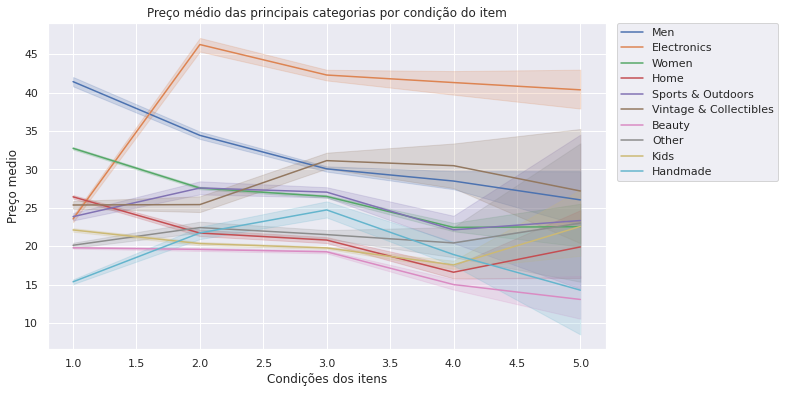

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x='item_condition_id', y='price',hue="main_cat", data=train)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel("Condições dos itens")
plt.ylabel("Preço medio")
plt.title("Preço médio das principais categorias por condição do item")
plt.show()

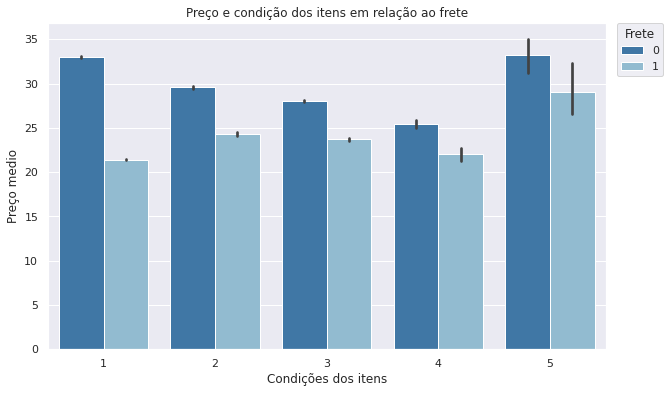

In [21]:
plt.figure(figsize=(10,6))
sns.set_palette("RdBu_r")

ax = sns.barplot(x="item_condition_id", y="price",
                 hue="shipping", data=train)

plt.legend(title='Frete', bbox_to_anchor=(1.02, 1),
           loc='upper left', borderaxespad=0)

plt.xlabel("Condições dos itens")
plt.ylabel("Preço medio")
plt.title("Preço e condição dos itens em relação ao frete")

plt.show()

O preço médio, independente da condição do item correspondem ao esperado em relação ao frete. Os itens com o preço médio maior possuem a maior parte dos itens com frete gratis. 

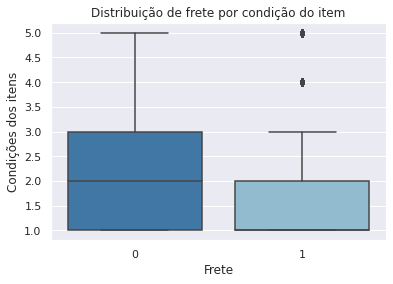

In [22]:
sns.boxplot(x='shipping', y='item_condition_id', data=train)
plt.xlabel("Frete")
plt.ylabel("Condições dos itens")
plt.title('Distribuição de frete por condição do item')
plt.show()

## EXPERIMENTANDO MODELOS

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

### Testando regressão linear

Testando o primeiro modelo de regressão linear para prever os preços dos itens utilizando apenas as colunas 'itens_condition_id' e 'shipping'.

In [24]:
X = train.drop(['name', 'item_description', 'price', 'main_cat', 'sub_cat_1', 'sub_cat_2'], axis=1)
y = train.price

X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [25]:
print(f'Valor R²: {r2_score(y_test, y_pred):.3f}')
print(f'Valor MAE: {mean_absolute_error(y_test, y_pred):.3f}')

Valor R²: 0.009
Valor MAE: 18.175


### Testando Regressão logistica

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix

In [51]:
# Transforma classe em categorico
train_modelado = train.copy()
train_modelado['item_condition_id'] = train_modelado['item_condition_id'].astype('category')


In [52]:
model = LogisticRegression()
baseline_df = train_modelado[['price','item_condition_id']].dropna()
y_1 = baseline_df.price
X_1 = pd.get_dummies(baseline_df['item_condition_id'], drop_first=False) # transforma categoria em dummies
print(X_1)

         1  2  3  4  5
0        0  0  1  0  0
1        0  0  1  0  0
2        1  0  0  0  0
3        1  0  0  0  0
4        1  0  0  0  0
...     .. .. .. .. ..
1476199  0  1  0  0  0
1476200  0  1  0  0  0
1476201  0  1  0  0  0
1476202  0  0  1  0  0
1476203  1  0  0  0  0

[1476204 rows x 5 columns]
